In [130]:
import random
import time
import matplotlib.pyplot as plt

# Approach 1

In [131]:
# generate random segments
# and define the Region of Interest
# filter the segments from that ROI
# measure performance of loop-based approach
# visualise using matplotlib

In [132]:
NUM_SEGMENTS = 100000
REGION_OF_INTEREST = [-1, -1, 3, 2]
COORD_RANGE = (-10, 10)

In [133]:
SEGMENTS = []

# bounding box
x_min, y_min, x_max, y_max = REGION_OF_INTEREST

# filtering using basic loops
FILTERED_SEGMENTS = []

In [134]:
start_time = time.time()

for _ in range(NUM_SEGMENTS):
    tmp_li = []
    for _ in range(4):
        tmp_li.append(random.uniform(*COORD_RANGE))
    SEGMENTS.append(tmp_li)

# x_min <= x1, x2 <= x_max AND
# y_min <= y1, y2 <= y_max
for x1, y1, x2, y2 in SEGMENTS:
    if x_min <= x1 <= x_max and x_min <= x2 <= x_max and y_min <= y1 <= y_max and y_min <= y2 <= y_max:
        FILTERED_SEGMENTS.append([x1, y1, x2, y2])

end_time = time.time()

total_time = end_time - start_time
print(f'Basic Loop Performance: {total_time:.4f} sec')
print(f'Filtered: {len(FILTERED_SEGMENTS)} segments from {len(SEGMENTS)}')

Basic Loop Performance: 4.6438 sec
Filtered: 81 segments from 100000


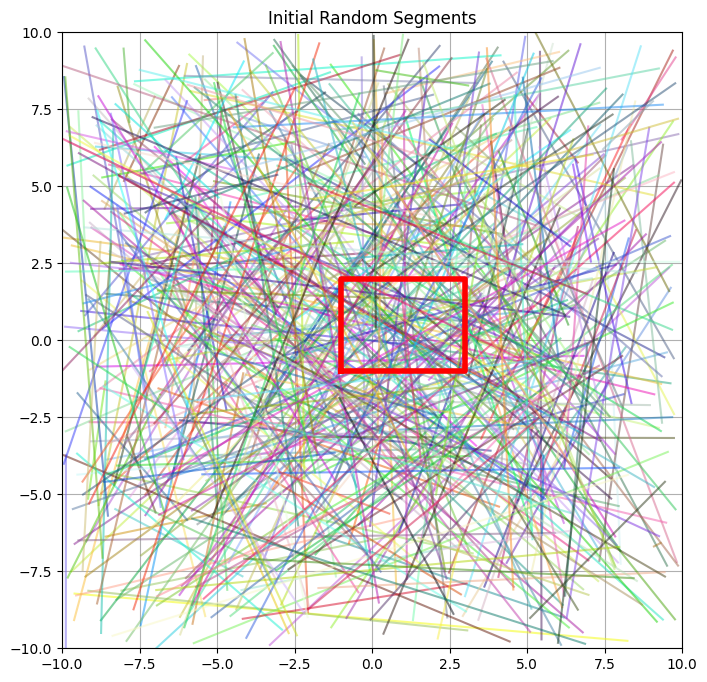

In [135]:
# plot 500 segments
plt.figure(figsize=(8, 8))
for x1, y1, x2, y2 in SEGMENTS[:500]:
    color = (random.random(), random.random(), random.random())
    plt.plot([x1, x2], [y1, y2], color=color, alpha=0.5)

# bounding box - ROI
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], 'r-', linewidth=4)
plt.title('Initial Random Segments')
plt.xlim(*COORD_RANGE)
plt.ylim(*COORD_RANGE)
plt.grid(True)
plt.show()

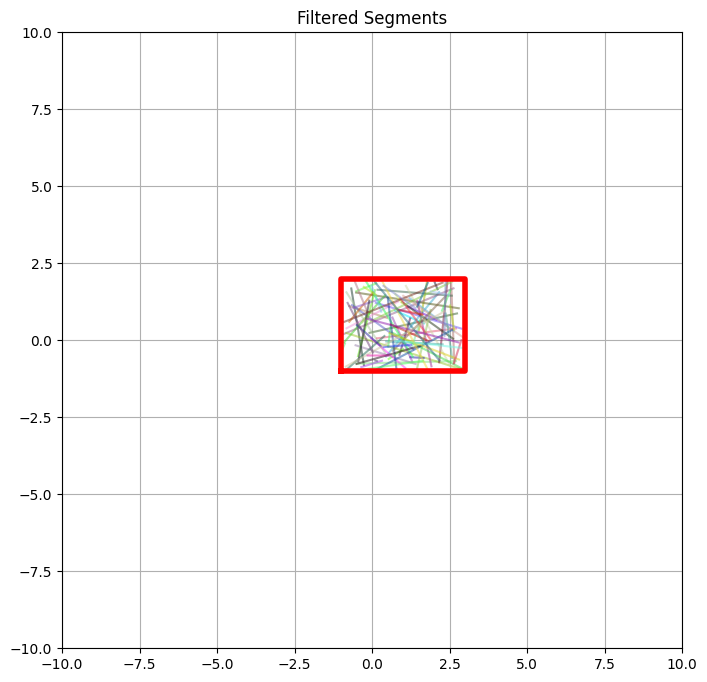

In [136]:
# plot filtered segments inside bounding box
plt.figure(figsize=(8, 8))
for x1, y1, x2, y2 in FILTERED_SEGMENTS[:500]:
    color = (random.random(), random.random(), random.random())
    plt.plot([x1, x2], [y1, y2], color=color, alpha=0.5)

# bounding box - ROI
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], 'r-', linewidth=4)
plt.title('Filtered Segments')
plt.xlim(*COORD_RANGE)
plt.ylim(*COORD_RANGE)
plt.grid(True)
plt.show()

# Approach 2

In [137]:
import numpy as np

In [138]:
start_time = time.time()

# generate segments
SEGMENTS_NP = np.random.uniform(COORD_RANGE[0], COORD_RANGE[1], (NUM_SEGMENTS, 4))

# filter segments within ROI
x1, y1, x2, y2 = SEGMENTS_NP[:, 0], SEGMENTS_NP[:, 1], SEGMENTS_NP[:, 2], SEGMENTS_NP[:,3]
mask = (x_min <= x1) & (x1 <= x_max) & (x_min <= x2) & (x2 <= x_max) &\
       (y_min <= y1) & (y1 <= y_max) & (y_min <= y2) & (y2 <= y_max)

FILTERED_SEGMENTS_NP = SEGMENTS_NP[mask]

end_time = time.time()
total_time = end_time - start_time

print(f'Basic Loop Performance: {total_time:.4f} sec')
print(f'Filtered: {len(FILTERED_SEGMENTS_NP)} segments from {len(SEGMENTS_NP)}')


Basic Loop Performance: 0.0043 sec
Filtered: 95 segments from 100000


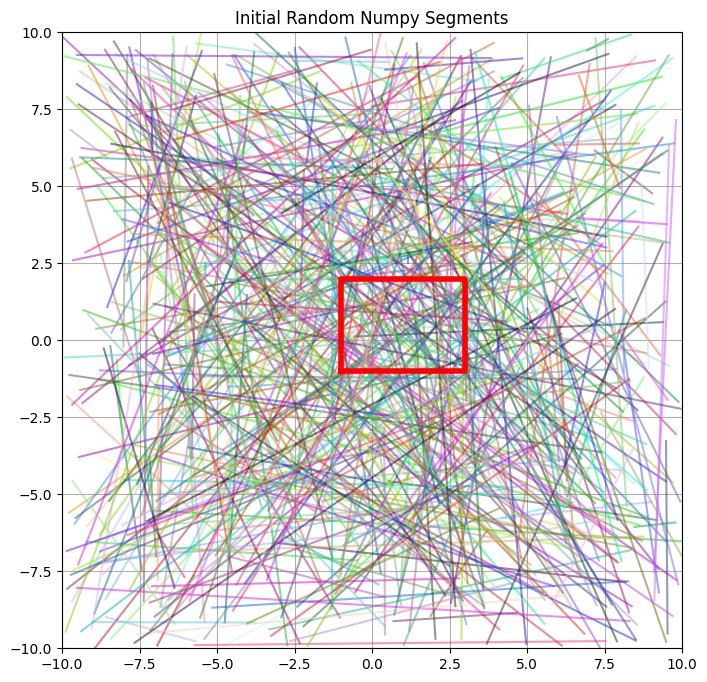

In [139]:
# plot 500 segments
colors = np.random.rand(500, 3)

plt.figure(figsize=(8, 8))
for i, (x1, y1, x2, y2) in enumerate(SEGMENTS_NP[:500]):
    color = (random.random(), random.random(), random.random())
    plt.plot([x1, x2], [y1, y2], color=colors[i], alpha=0.5)

# bounding box - ROI
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], 'r-', linewidth=4)
plt.title('Initial Random Numpy Segments')
plt.xlim(*COORD_RANGE)
plt.ylim(*COORD_RANGE)
plt.grid(True)
plt.show()

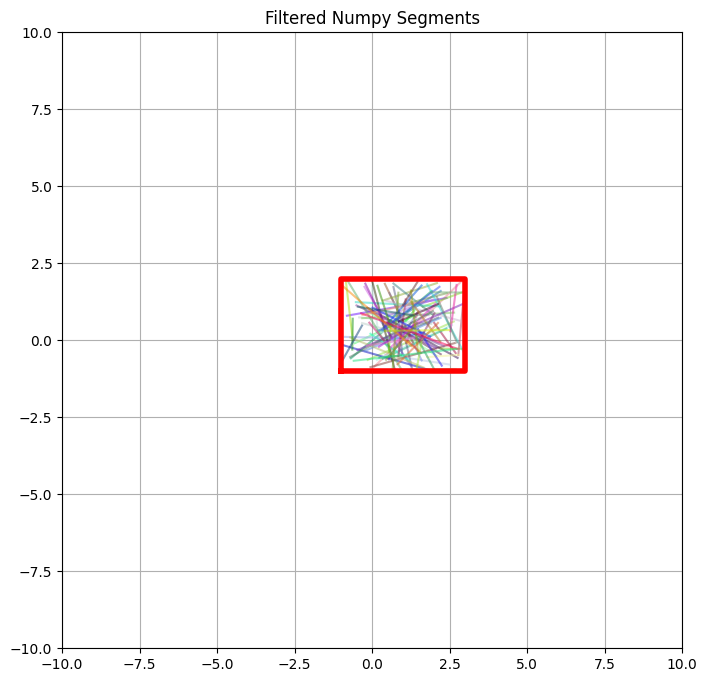

In [140]:
# plot filtered segments inside bounding box
plt.figure(figsize=(8, 8))
for i, (x1, y1, x2, y2) in enumerate(FILTERED_SEGMENTS_NP[:500]):
    plt.plot([x1, x2], [y1, y2], color=colors[i], alpha=0.5)

# bounding box - ROI
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], 'r-', linewidth=4)
plt.title('Filtered Numpy Segments')
plt.xlim(*COORD_RANGE)
plt.ylim(*COORD_RANGE)
plt.grid(True)
plt.show()